# Should this loan be approved or not?

In [1]:
%%capture
!pip install numpy pandas matplotlib seaborn uszipcode

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from uszipcode import SearchEngine
search = SearchEngine()

%matplotlib inline

c:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
SBA = pd.read_csv('SBAnational.csv',index_col=None, na_values=['nan'])
SBA.head()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_24804\721128604.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  SBA = pd.read_csv('SBAnational.csv',index_col=None, na_values=['nan'])


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
SBA.drop_duplicates(keep='first')
print(SBA.shape)

(899164, 27)


In [5]:
SBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

In [6]:
def information(df):
    list_item = []
    for col in df.columns:
        # list_item.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(SBA[col]))*100,2),
        #                 df[col].nunique(), list(df[col].sample(5).drop_duplicates().values)])

        list_item.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(SBA[col]))*100,2),
                        df[col].nunique()])
    dfDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPercentage', 'unique'],data=list_item)
    print(dfDesc)

In [7]:
information(SBA)

              feature data_type    null  nulPercentage  unique
0       LoanNr_ChkDgt     int64       0           0.00  899164
1                Name    object      14           0.00  779583
2                City    object      30           0.00   32581
3               State    object      14           0.00      51
4                 Zip     int64       0           0.00   33611
5                Bank    object    1559           0.17    5802
6           BankState    object    1566           0.17      56
7               NAICS     int64       0           0.00    1312
8        ApprovalDate    object       0           0.00    9859
9          ApprovalFY    object       0           0.00      70
10               Term     int64       0           0.00     412
11              NoEmp     int64       0           0.00     599
12           NewExist   float64     136           0.02       3
13          CreateJob     int64       0           0.00     246
14        RetainedJob     int64       0           0.00 

In [8]:
list_item = []
for col in SBA.columns:
    list_item.append([col, SBA[col].dtype, SBA[col].isna().sum(), round((SBA[col].isna().sum()/len(SBA[col]))*100,2),
                      SBA[col].nunique(), list(SBA[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPercentage', 'unique', 'uniqueSample'],data=list_item)
dfDesc

,feature,data_type,null,nulPercentage,unique,uniqueSample
0,LoanNr_ChkDgt,int64,0,0.00,899164,"[8062203002, 1071585003, 4975964010, 379060400..."
1,Name,object,14,0.00,779583,"[MORGAN FARM, KITCHEN & COMPANY, American Pie ..."
2,City,object,30,0.00,32581,"[PEQUOT LAKES, FLORENCE, CARSON, NORTH SCITUAT..."
3,State,object,14,0.00,51,"[WA, PA, KS, LA]"
4,Zip,int64,0,0.00,33611,"[79109, 62896, 85281, 91303, 90806]"
5,Bank,object,1559,0.17,5802,"[SBA - EDF ENFORCEMENT ACTION, THE BANK & TRUS..."
6,BankState,object,1566,0.17,56,"[VA, CA, MO, AR]"
7,NAICS,int64,0,0.00,1312,"[235610, 315999, 453110, 424990, 0]"
8,ApprovalDate,object,0,0.00,9859,"[17-Jun-09, 1-Mar-95, 14-Feb-01, 21-Nov-94, 3-..."
9,ApprovalFY,object,0,0.00,70,"[1980, 2002, 2003, 1995, 2006]"


## Data Exploring & Feature Selection
### 1. Target Feature
The `MIS_Status` is the feature explains which borrower cannot repay loans => Target Feature

In [9]:
print(SBA.shape)
SBA.value_counts('MIS_Status') #Quite imbalanced

(899164, 27)


MIS_Status
P I F     739609
CHGOFF    157558
dtype: int64

### 2. Input Feature
##### 2.1. Borrower and Institusion Information Feature
From SBA Data Frame we can make a conclusion that there are seven columns that give personal and instituion information
- `LoanNr_ChkDgt` as borrower Identifeir
- `Name` as Borrower Name
- `City` as Borrower City
- `State` as Borrower State
- `Zip` as Borrower Zip Code
- `Bank` as Bank Name
- `BankState` as Bank State
- `FranchiseCode` as FranchiseCode
- `UrbanRural` as information about business

I think only `City` and `State` should be considered since Geography plays a significant role in the field of business.

###### **FranchiseCode**

In [10]:
SBA.loc[(SBA['FranchiseCode'] == 1), 'FranchiseCode'] = 0
SBA.loc[(SBA['FranchiseCode'] != 0), 'FranchiseCode'] = 1

# no Franchise 
print('No Franchise')
cond_1 = SBA[(SBA['FranchiseCode'] == 0)] 
print(cond_1.value_counts('MIS_Status'))

print('*'*20)
# no Franchise 
print('Franchise')
cond_2 = SBA[(SBA['FranchiseCode'] == 1)] 
print(cond_2.value_counts('MIS_Status'))
# you can see that the rate between 'P I F' and 'CHGOFF' is similar
# -> the 'FranchiseCode' feature is not important


No Franchise
MIS_Status
P I F     695737
CHGOFF    149698
dtype: int64
********************
Franchise
MIS_Status
P I F     43872
CHGOFF     7860
dtype: int64


###### **UrbanRural**

In [11]:
SBA.value_counts('UrbanRural')
# 0 is undefined

UrbanRural
1    470654
0    323167
2    105343
dtype: int64

In [12]:
# Urban
print('Urban')
cond_3 = SBA[SBA['UrbanRural'] == 1] 
print(cond_3.value_counts('MIS_Status'))

print('*'*20)

# Rural
print('Rural')
cond_4 = SBA[SBA['UrbanRural'] == 2] 
print(cond_4.value_counts('MIS_Status'))
# the ratio is similar and 
# there are too much undefined value (~ 30%) -> drop this columns

Urban


MIS_Status
P I F     354414
CHGOFF    114867
dtype: int64
********************
Rural
MIS_Status
P I F     85347
CHGOFF    19713
dtype: int64


##### 2.2. NAICS (North American industry classification system code)
- `NAICS` is a classification system of several types of industries registered in America. 

The first two digits of `NAICS` explained the type of business industries.

The type of industry will affect the company's performance in business. So that this feature will affect the potential of the company.

In [13]:
SBA['NAICS'].value_counts() # A lot of inappropriate values

0         201948
722110     27989
722211     19448
811111     14585
621210     14048
           ...  
927110         1
327410         1
314992         1
922110         1
325192         1
Name: NAICS, Length: 1312, dtype: int64

##### 2.3. Date and Time Feature
- `ApprovalDate` : Date SBA commitment issued
- `ApprovalFY` : Fiscal year of commitment
- `DisbursementDate` : Disbursement date

- `ChgOffDate` : The date when a loan is declared to be in default

Since these features are used only for additional informations, I think we can drop them.

The first three features are in the same period of history. At the time the loan application is requested, we cannot predict how the economic situation will change so these features will not provide any important information.

The last feature is just know after a loan is declared to be in default
-> drop

##### 2.4. Term
The `Term` provides information on how long the loan will take. 

Concerning the rules of risk management, the longer the duration, the greater the uncertainty that will lead to risk. 

In [14]:
# Let's count unique values in Term column
SBA['Term'].value_counts() # Quite a lot of unique values

84     230162
60      89945
240     85982
120     77654
300     44727
        ...  
438         1
382         1
367         1
374         1
429         1
Name: Term, Length: 412, dtype: int64

##### 2.5. Job Columns
- `NoEmp` : Number of business employees 
- `CreateJob` : Number of jobs created
- `RetainedJob` : Number of jobs retained

Only `NoEmp` is useful here since it indicates how big the company is.

<AxesSubplot: xlabel='MIS_Status', ylabel='NoEmp'>

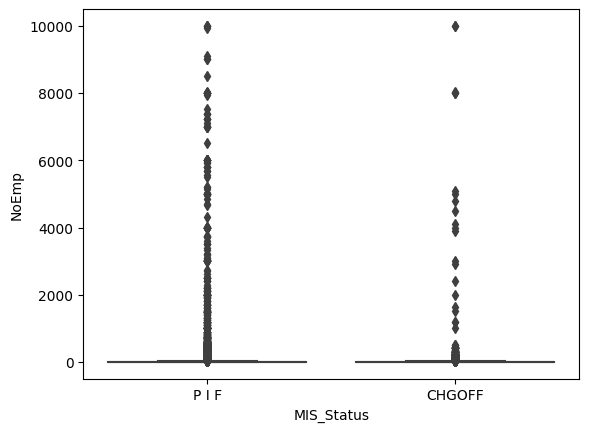

In [15]:
sns.boxplot(x=SBA.MIS_Status, y=SBA['NoEmp'])
# Seems like companies with a small number of employees are more likely to default

<AxesSubplot: xlabel='MIS_Status', ylabel='CreateJob'>

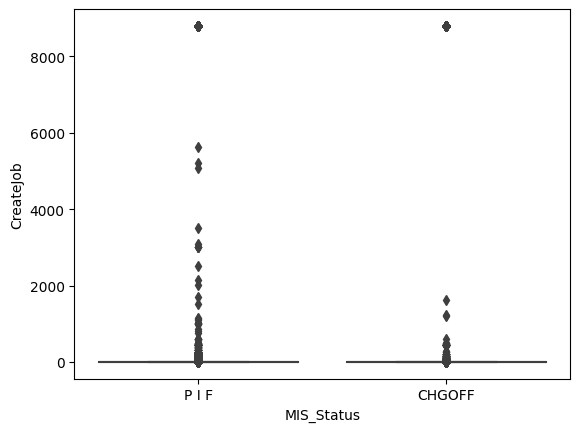

In [16]:
sns.boxplot(x=SBA.MIS_Status, y=SBA['CreateJob'])

<AxesSubplot: xlabel='MIS_Status', ylabel='RetainedJob'>

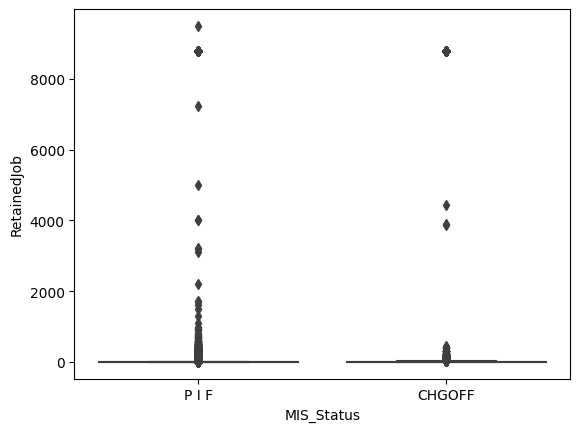

In [17]:
sns.boxplot(x=SBA.MIS_Status, y=SBA['RetainedJob'])

In [18]:
# define outliers function
def outliers(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]

In [19]:
# Percentage of outliers in all 3 columns
print('Percentage of outliers in NoEmp: ', round(len(outliers(SBA, 'NoEmp'))/len(SBA)*100,2), '%')
print('Percentage of outliers in CreateJob: ', round(len(outliers(SBA, 'CreateJob'))/len(SBA)*100,2), '%')
print('Percentage of outliers in RetainedJob: ', round(len(outliers(SBA, 'RetainedJob'))/len(SBA)*100,2), '%')

Percentage of outliers in NoEmp:  10.81 %
Percentage of outliers in CreateJob:  16.56 %
Percentage of outliers in RetainedJob:  10.08 %


##### 2.6. Business conditions: a new or existing business.
- `NewExist` = 1: Existing business
- `NewExist` = 2: New business

In [20]:
SBA['NewExist'].value_counts() # And 106 nan values

1.0    644869
2.0    253125
0.0      1034
Name: NewExist, dtype: int64

In [21]:
# The 0 values of NewExist column are not in the data dictionary
# I will consider them as missing values
SBA['NewExist'] = SBA['NewExist'].replace(0, np.nan)

##### 2.7. Loan Transaction Type Feature
- `RevLineCr` : Revolving line of credit which means that if the loan has been paid, the borrower can be able to immediately borrow again.
- `LowDoc` : LowDoc Loan Program means the borrower can borrow with reduced documentation requirements, allowing businesses to apply with minimal paperwork.

Loan type can impact a borrower's financial stability, decision-making, and repayment behavior. Lenders also need to manage risks associated with different transaction types. Both parties should carefully evaluate the loan type before proceeding.

###### **RevLineCr**

In [22]:
# Revolving line of credit: Y = Yes, N = No
SBA['RevLineCr'].value_counts() # And there are null values

N    420288
0    257602
Y    201397
T     15284
1        23
R        14
`        11
2         6
C         2
3         1
,         1
7         1
A         1
5         1
.         1
4         1
-         1
Q         1
Name: RevLineCr, dtype: int64

In [23]:
SBA[(SBA['RevLineCr'] != 'Y') & (SBA['RevLineCr'] != 'N')]['RevLineCr'].count() # And there are null values
# There are 272951 nulls in RevLineCr feature

272951

In [24]:
# Y RevLineCr
print('Y RevLineCr')
cond_1 = SBA[(SBA['RevLineCr'] == 'Y')] 
print(cond_1.value_counts('MIS_Status'))

print('*'*20)

# N RevLineCr
print('N RevLineCr')
cond_2 = SBA[(SBA['RevLineCr'] == 'N')] 
print(cond_2.value_counts('MIS_Status'))

# Loan applications which borrower don't have revolving line of credit
# have a significantly higher repayment capacity (~6/1 vs. ~3/1) 

# We can't find any clear pattern from this data and 
# there are a lot of NAs in this row 
# So we decided to delete this column


Y RevLineCr
MIS_Status
P I F     149670
CHGOFF     50990
dtype: int64
********************
N RevLineCr
MIS_Status
P I F     357851
CHGOFF     61401
dtype: int64


###### **LowDoc**

In [25]:
# LowDoc: Y = Yes, N = No
SBA['LowDoc'].value_counts() # And there are null values

N    782822
Y    110335
0      1491
C       758
S       603
A       497
R        75
1         1
Name: LowDoc, dtype: int64

In [26]:
# Number of nulls - LowDoc
SBA[(SBA['LowDoc'] != 'Y') & (SBA['LowDoc'] != 'N')]['LowDoc'].count() # And there are null values

3425

In [27]:
# Y LowDoc 
print('Y')
cond_1 = SBA[(SBA['LowDoc'] == 'Y')] 
print(cond_1.value_counts('MIS_Status'))

print('*'*20)

# N LowDoc
print('N')
cond_2 = SBA[(SBA['LowDoc'] == 'N')] 
print(cond_2.value_counts('MIS_Status'))

# Loan applications under the LowDoc program have a 
# significantly higher repayment capacity (~10/1 vs ~6/1)
# There are about 3425 null values in this feature
# We decide to impute this feature

Y
MIS_Status
P I F     100267
CHGOFF      9904
dtype: int64
********************
N
MIS_Status
P I F     634920
CHGOFF    146077
dtype: int64


##### 2.8. Amount of Loan
- `DisbursementGross `: Amount disbursed, tổng số tiền đã được chuyển giao cho khách hàng trước khi default được tuyên bố.
- `BalanceGross `: Gross amount outstanding
- `ChgOffPrinGr` : Charged-off amount
- `GrAppv `: Gross amount of loan approved by bank
- `SBA_Appv `: SBA's guaranteed amount of approved loan

Since `DisbursementGross`, `BalanceGross`, and `ChgOffPrinGr` only explain the balance of the loan and not used for loan approval, so these features can be ignored.

Columns `DisbursementGross`, `BalanceGross` and `ChgOffPrinGr` contain information that is important after default is declared, so we can't use these columns for predicting default risks. We delete them.

In [28]:
SBA[['DisbursementGross', 'BalanceGross', 'ChgOffPrinGr', 'GrAppv','SBA_Appv']]

,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv
0,"$60,000.00",$0.00,$0.00,"$60,000.00","$48,000.00"
1,"$40,000.00",$0.00,$0.00,"$40,000.00","$32,000.00"
2,"$287,000.00",$0.00,$0.00,"$287,000.00","$215,250.00"
3,"$35,000.00",$0.00,$0.00,"$35,000.00","$28,000.00"
4,"$229,000.00",$0.00,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...
899159,"$70,000.00",$0.00,$0.00,"$70,000.00","$56,000.00"
899160,"$85,000.00",$0.00,$0.00,"$85,000.00","$42,500.00"
899161,"$300,000.00",$0.00,$0.00,"$300,000.00","$225,000.00"
899162,"$75,000.00",$0.00,"$46,383.00","$75,000.00","$60,000.00"


### 3. Drop all unnecessary features

In [29]:
# Drop all unnecessary features
SBA = SBA.drop(columns = ['LoanNr_ChkDgt', 'Name', 'Bank', 'BankState', 'ApprovalDate',
                          'ApprovalFY', 'CreateJob', 'FranchiseCode', 'UrbanRural',
                          'RevLineCr', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross', 
                          'BalanceGross', 'ChgOffPrinGr'])

# Since I can use Zip to impute City and State
# RetainedJob is a feature that I can use to impute NewExist
# So I will drop them later

In [30]:
SBA.head()

,City,State,Zip,NAICS,Term,NoEmp,NewExist,RetainedJob,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,EVANSVILLE,IN,47711,451120,84,4,2.0,0,Y,P I F,"$60,000.00","$48,000.00"
1,NEW PARIS,IN,46526,722410,60,2,2.0,0,Y,P I F,"$40,000.00","$32,000.00"
2,BLOOMINGTON,IN,47401,621210,180,7,1.0,0,N,P I F,"$287,000.00","$215,250.00"
3,BROKEN ARROW,OK,74012,0,60,2,1.0,0,Y,P I F,"$35,000.00","$28,000.00"
4,ORLANDO,FL,32801,0,240,14,1.0,7,N,P I F,"$229,000.00","$229,000.00"


In [31]:
SBA.shape

(899164, 12)

## Handling missing values

In [32]:
list_item = []
for col in SBA.columns:
    list_item.append([col, SBA[col].dtype, SBA[col].isna().sum(), round((SBA[col].isna().sum()/len(SBA[col]))*100,2),
                      SBA[col].nunique(), list(SBA[col].sample(5).drop_duplicates().values)])

dfDesc = pd.DataFrame(columns=['feature', 'data_type', 'null', 'nulPercentage', 'unique', 'uniqueSample'],data=list_item)
dfDesc

,feature,data_type,null,nulPercentage,unique,uniqueSample
0,City,object,30,0.00,32581,"[WESLACO, Norwalk, CUMBERLAND (BR. P.O.), NORW..."
1,State,object,14,0.00,51,"[NY, MD, TN, SC, LA]"
2,Zip,int64,0,0.00,33611,"[80807, 50265, 21774, 2632, 35115]"
3,NAICS,int64,0,0.00,1312,"[0, 448310, 811192, 423830, 236118]"
4,Term,int64,0,0.00,412,"[60, 240, 3, 114, 84]"
5,NoEmp,int64,0,0.00,599,"[25, 10, 7, 2]"
6,NewExist,float64,1170,0.13,2,"[2.0, 1.0]"
7,RetainedJob,int64,0,0.00,358,"[1, 0]"
8,LowDoc,object,2582,0.29,8,[N]
9,MIS_Status,object,1997,0.22,2,[P I F]


In [33]:
# Check for null values
for col in SBA.columns:
    print(col, SBA[col].isnull().sum())

City 30
State 14
Zip 0
NAICS 0
Term 0
NoEmp 0
NewExist 1170
RetainedJob 0
LowDoc 2582
MIS_Status 1997
GrAppv 0
SBA_Appv 0


##### Impute LowDoc

In [34]:
print('Number of invalid values (consist of null values):')
invalid = (SBA['LowDoc'].isnull()) | ((SBA['LowDoc'] != 'Y') & (SBA['LowDoc'] != 'N'))
SBA[invalid]['LowDoc'].shape[0]
# Because count() don't count null values -> so we can not use count()
# After this block, I will call null values by invalid values

Number of invalid values (consist of null values):


6007

###### **LowDoc - GrAppv**

In [35]:
# convert to float - preprocessing before imputing
SBA['GrAppv'] = SBA['GrAppv'].replace('[\$,]', '', regex=True).astype(float)

In [36]:
# proof assumption: 
# the borrower have 'GrAppv' > 150000, the value of LowDoc is 'N'
SBA[SBA['GrAppv'] > 150000].value_counts(['LowDoc'])
# N/Y ~ 300/1

LowDoc
N         292983
0           1144
C            508
A            125
S             57
Y             16
R             11
1              1
dtype: int64

In [37]:
# Number of invalid values can be imputed by this assumption
invalid = (SBA['LowDoc'].isnull()) | ((SBA['LowDoc'] != 'Y') & (SBA['LowDoc'] != 'N'))
cond = (SBA['GrAppv'] > 150000) 
print("Number of invalid values can be imputed by this assumption:",
      SBA[cond & invalid]['LowDoc'].shape[0])

# Impute
SBA.loc[cond & invalid, 'LowDoc'] = 'N'

# Number of invalid values after imputing
invalid = (SBA['LowDoc'].isnull()) | ((SBA['LowDoc'] != 'Y') & (SBA['LowDoc'] != 'N'))
print("Number of invalid values after imputing:", SBA[invalid]['LowDoc'].shape[0])

Number of invalid values can be imputed by this assumption: 2238
Number of invalid values after imputing: 3769


###### **LowDoc - Term**

In [38]:
# proof assumption:
# the borrower have Term >= 200 -> the value of LowDoc is 'N'
# Y LowDoc 
print('Term >= 200')
cond_1 = SBA[(SBA['Term'] >= 200)] 
print(cond_1.value_counts('LowDoc'))
# N/Y ~ 52/1

Term >= 200
LowDoc
N    157512
Y      3665
0        77
C        25
A         3
S         1
dtype: int64


In [39]:
# Number of invalid values can be imputed by this assumption
invalid = (SBA['LowDoc'].isnull()) | ((SBA['LowDoc'] != 'Y') & (SBA['LowDoc'] != 'N'))
cond = SBA['Term'] >= 200
print("Number of invalid values can be imputed by this assumption:",
      SBA[cond & invalid]['LowDoc'].shape[0])

# Impute
SBA.loc[cond & invalid, 'LowDoc'] = 'N'

# Number of invalid values after imputing
invalid = (SBA['LowDoc'].isnull()) | ((SBA['LowDoc'] != 'Y') & (SBA['LowDoc'] != 'N'))
print("Number of invalid values after imputing:", SBA[invalid]['LowDoc'].shape[0])

Number of invalid values can be imputed by this assumption: 112
Number of invalid values after imputing: 3657


###### **LowDoc - NoEmp**

In [40]:
# proof the assumption
# the borrower have NoEmp >= 10 -> the value of LowDoc is 'N'
print('NoEmp >= 10')
SBA[SBA['NoEmp'] >= 10].value_counts('LowDoc')
# N/Y ~ 14

NoEmp >= 10


LowDoc
N    231476
Y     16620
0        93
C        83
S        64
A        34
R         5
dtype: int64

In [41]:
# Number of invalid values can be imputed by this assumption
invalid = (SBA['LowDoc'].isnull()) | ((SBA['LowDoc'] != 'Y') & (SBA['LowDoc'] != 'N'))
cond = (SBA['NoEmp']  >= 10)
print("Number of invalid values can be imputed by this assumption:",
      SBA[cond & invalid]['LowDoc'].shape[0])

# Impute
SBA.loc[cond & invalid, 'LowDoc'] = 'N'

# Number of invalid values after imputing
invalid = (SBA['LowDoc'].isnull()) | ((SBA['LowDoc'] != 'Y') & (SBA['LowDoc'] != 'N'))
print("Number of invalid values after imputing:", SBA[invalid]['LowDoc'].shape[0])

Number of invalid values can be imputed by this assumption: 503
Number of invalid values after imputing: 3154


In [42]:
# At this stage, I have no idea how to impute other invalid values
# So, I will drop others
SBA = SBA[(SBA['LowDoc'] == 'Y') | (SBA['LowDoc'] == 'N')]
SBA.head()

,City,State,Zip,NAICS,Term,NoEmp,NewExist,RetainedJob,LowDoc,MIS_Status,GrAppv,SBA_Appv
0,EVANSVILLE,IN,47711,451120,84,4,2.0,0,Y,P I F,60000.0,"$48,000.00"
1,NEW PARIS,IN,46526,722410,60,2,2.0,0,Y,P I F,40000.0,"$32,000.00"
2,BLOOMINGTON,IN,47401,621210,180,7,1.0,0,N,P I F,287000.0,"$215,250.00"
3,BROKEN ARROW,OK,74012,0,60,2,1.0,0,Y,P I F,35000.0,"$28,000.00"
4,ORLANDO,FL,32801,0,240,14,1.0,7,N,P I F,229000.0,"$229,000.00"


In [43]:
information(SBA)

        feature data_type  null  nulPercentage  unique
0          City    object    30           0.00   32502
1         State    object    14           0.00      51
2           Zip     int64     0           0.00   33588
3         NAICS     int64     0           0.00    1311
4          Term     int64     0           0.00     412
5         NoEmp     int64     0           0.00     599
6      NewExist   float64  1166           0.13       2
7   RetainedJob     int64     0           0.00     358
8        LowDoc    object     0           0.00       2
9    MIS_Status    object  1991           0.22       2
10       GrAppv   float64     0           0.00   22110
11     SBA_Appv    object     0           0.00   38303


##### Impute City

In [44]:
# Loop through Zip column and fill in missing values in City and State columns
# By using the uszipcode library

# Iterate over each row in the DataFrame
for index, row in SBA.iterrows():
    city = row['City']
    state = row['State']
    zip_code = row['Zip']

    # Check if either City or State is null and Zip is not null
    if pd.isnull(city) or pd.isnull(state) and not pd.isnull(zip_code):
        # Use the SearchEngine to search for the City and State based on the Zip code
        result = search.by_zipcode(zip_code)
        
        # Check if the result is found
        if result is not None:
            # If City is null, fill it with the retrieved City value
            if pd.isnull(city):
                SBA.at[index, 'City'] = result.major_city
            
            # If State is null, fill it with the retrieved State value
            if pd.isnull(state):
                SBA.at[index, 'State'] = result.state
            
        else:
            # Drop the row if the Zip code is inappropriate and City or State is null
            SBA.drop(index, inplace=True)
            
SBA = SBA.drop(columns=['Zip'])

In [45]:
# After checking values in the City column, I found that there are some values that are not cities which has many special characters
# I will drop these rows
SBA = SBA[SBA['City'].str.contains('^[a-zA-Z]+$', regex=True)]
SBA.shape

(633633, 11)

##### NAICS

In [46]:
SBA['NAICS'] = SBA['NAICS'].apply(lambda x: int(str(x)[:2]) if len(str(x)) == 6 else np.nan)
SBA.dropna(subset=['NAICS'], inplace=True)

##### NewExist

In [47]:
# There is the column RetainedJob which is the number of jobs retained
# Which means if the retained job is 0, the business is new, else it is existing
# By that way of thinking, I will fill the missing values of NewExist column with 1 if RetainedJob is not 0, else 2
SBA.loc[(SBA['NewExist'].isnull()) & (SBA['RetainedJob'] != 0), 'NewExist'] = 1
SBA.loc[(SBA['NewExist'].isnull()) & (SBA['RetainedJob'] == 0), 'NewExist'] = 2
SBA = SBA.drop(columns=['RetainedJob'])

##### Currency columns

In [49]:
# Cleaning currency columns
SBA['GrAppv'] = SBA['GrAppv'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))
SBA['SBA_Appv'] = SBA['SBA_Appv'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')))

##### MIS_Status

In [50]:
# I have to drop null values in the MIS_Status column
# Since it is the target column
SBA.dropna(subset=['MIS_Status'], inplace=True)

In [51]:
print(SBA.shape)
SBA['MIS_Status'].value_counts()

(486644, 10)


P I F     390296
CHGOFF     96348
Name: MIS_Status, dtype: int64

# Export Data

In [54]:
information(SBA)

      feature data_type  null  nulPercentage  unique
0        City    object     0            0.0   16758
1       State    object     0            0.0      51
2       NAICS   float64     0            0.0      24
3        Term     int64     0            0.0     362
4       NoEmp     int64     0            0.0     451
5    NewExist   float64     0            0.0       2
6      LowDoc    object     0            0.0       2
7  MIS_Status    object     0            0.0       2
8      GrAppv   float64     0            0.0   14267
9    SBA_Appv   float64     0            0.0   23764


In [52]:
# Export the cleaned data
SBA.to_csv('SBA_cleaned.csv', index=False)